In [1]:
import pandas as pd
import numpy as np

df_annotations = pd.read_csv('annotations.csv.zip').set_index('ytid')
df_annotations

,start_seconds,end_seconds,positive_labels,dataset_split,plausible_superclass,check_status,log_mfb_path,energy_path
ytid,,,,,,,,
--4gqARaEJE,0.0,10.0,"""/m/068hy,/m/07q6cd_,/m/0bt9lr,/m/0jbk""",eval,noise,good,good/eval/noise/--4gqARaEJE/log_mfb.npy,good/eval/noise/--4gqARaEJE/energy.npy
--BfvyPmVMo,20.0,30.0,"""/m/03l9g""",eval,noise,good,good/eval/noise/--BfvyPmVMo/log_mfb.npy,good/eval/noise/--BfvyPmVMo/energy.npy
-0Gj8-vB1q4,30.0,40.0,"""/m/0140xf,/m/02cjck,/m/04rlf""",eval,music,good,good/eval/music/-0Gj8-vB1q4/log_mfb.npy,good/eval/music/-0Gj8-vB1q4/energy.npy
-0RWZT-miFs,420.0,430.0,"""/m/03v3yw,/m/0k4j""",eval,noise,bad,bad/eval/noise/-0RWZT-miFs/log_mfb.npy,bad/eval/noise/-0RWZT-miFs/energy.npy
-0YUDn-1yII,30.0,40.0,"""/m/02cjck,/m/04rlf""",eval,music,bad,bad/eval/music/-0YUDn-1yII/log_mfb.npy,bad/eval/music/-0YUDn-1yII/energy.npy
...,...,...,...,...,...,...,...,...
zzfcNds_9_g,30.0,40.0,"""/m/09x0r""",train_unbalanced,speech,unchecked,unchecked/train_unbalanced/speech/zzfcNds_9_g/...,unchecked/train_unbalanced/speech/zzfcNds_9_g/...
zzlfP-snUeY,10.0,20.0,"""/m/02mk9,/m/07pb8fc,/m/07yv9,/t/dd00129""",train_unbalanced,noise,unchecked,unchecked/train_unbalanced/noise/zzlfP-snUeY/l...,unchecked/train_unbalanced/noise/zzlfP-snUeY/e...
zznhOWygvlo,20.0,30.0,"""/m/09x0r""",train_unbalanced,speech,unchecked,unchecked/train_unbalanced/speech/zznhOWygvlo/...,unchecked/train_unbalanced/speech/zznhOWygvlo/...


In [3]:
import zipfile
import numpy as np

dataset_path = r'G:\datasets\audioset-derived.zip'
dataset = zipfile.ZipFile(dataset_path,'r')

def load_mfb(ytid):
    with dataset.open(df_annotations.loc[ytid].log_mfb_path) as f:
        return np.load(f)

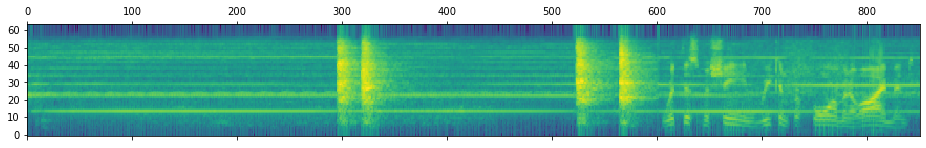

In [6]:
import matplotlib.pyplot as plt

example_log_mfb = load_mfb('--BfvyPmVMo')
plt.matshow(example_log_mfb.T, origin='lower',aspect='auto')